In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
housing=pd.read_csv('/content/sample_data/california_housing_test.csv')

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [4]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0
2999,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0


In [5]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


CHECKING FOR MISSING VALUES

In [6]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [7]:
housing.shape

(3000, 9)

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


<Axes: >

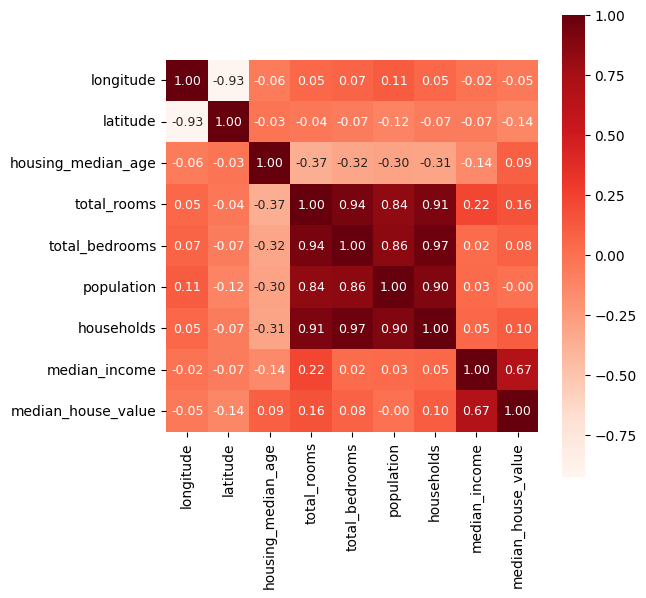

In [12]:
correlation=housing.corr()
plt.figure(figsize=(6,6))
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':9},cmap='Reds')

In [13]:
X=housing.drop(['median_house_value'],axis=1)
Y=housing['median_house_value']

In [14]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375
...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708


In [15]:
Y

0       344700.0
1       176500.0
2       270500.0
3       330000.0
4        81700.0
          ...   
2995    225000.0
2996    237200.0
2997     62000.0
2998    162500.0
2999    500001.0
Name: median_house_value, Length: 3000, dtype: float64

TRAIN AND TEST SPLIT

In [16]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [17]:
print(X.shape,x_train.shape,x_test.shape)

(3000, 8) (2400, 8) (600, 8)


In [19]:
from xgboost import XGBRegressor
model=XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [20]:
prediction=model.predict(x_train)

In [21]:
print(prediction)

[138456.7  140831.97 143812.17 ... 314949.62 482562.16 126110.52]


In [24]:
from sklearn import metrics
score=metrics.r2_score(y_train,prediction)
score1=metrics.mean_absolute_error(y_train,prediction)
print('R-Squared error',score)
print('Absolute error',score1)

R-Squared error 0.9929320052748798
Absolute error 7044.060901692708


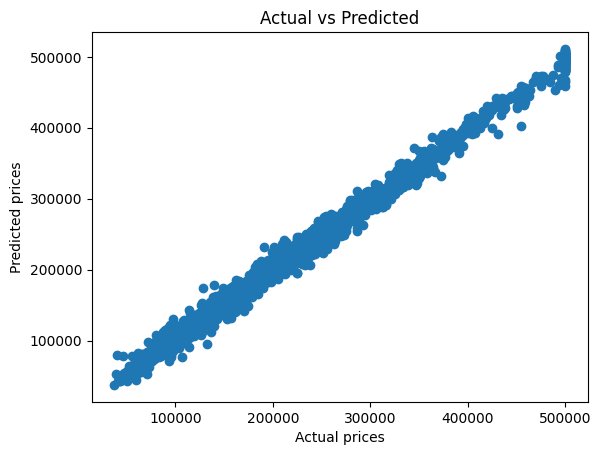

In [25]:
plt.scatter(y_train,prediction)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual vs Predicted')
plt.show()